In [1]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import patsy

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
data_df = pd.read_csv('../data/all_tips_data.csv')
print data_df.shape
data_df.head()

(617, 52)


,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,enduserid,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
0,10001,1940-12-22,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,183,12,53,2015-07-13,0.773585,147.0,68.0,55.0,269.2,97.0,57.0,27231 days 00:00:00.000000000,38,371 days 00:00:00.000000000,3,1,3,6,1,14,3
1,10002,1933-04-24,0.0,0.0,0.0,1.0,0.0,NaN,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,185,24,50,2015-08-10,0.520000,135.0,74.0,69.0,195.8,96.0,62.0,30058 days 00:00:00.000000000,21,353 days 00:00:00.000000000,1,0,0,4,2,7,4
2,10004,1948-12-15,0.0,NaN,0.0,0.0,NaN,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,188,1,2,2015-12-21,0.500000,110.0,75.0,72.0,252.0,97.0,71.0,24477 days 00:00:00.000000000,8,172 days 00:00:00.000000000,1,0,1,3,0,5,2
3,10006,1948-11-28,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,193,24,51,2015-07-20,0.529412,122.0,78.0,61.0,250.7,97.0,60.0,24340 days 00:00:00.000000000,18,357 days 00:00:00.000000000,0,0,0,2,0,2,2
4,10009,1927-10-06,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,196,9,53,2015-07-13,0.830189,144.0,86.0,72.0,152.1,93.0,71.0,32057 days 00:00:00.000000000,49,371 days 00:00:00.000000000,1,0,0,2,0,3,1


In [3]:
data_df.dtypes

pin                          int64
d.o.b.                      object
medicaid                   float64
hospitalized               float64
rpm_hospitalized           float64
rpm_falls                  float64
rehospitalized             float64
rpm_rehospitalized         float64
chf                          int64
copd                         int64
diabetes                     int64
hypertension                 int64
stroke                       int64
hypoglycemia                 int64
falls                        int64
liver_disease                int64
hypotension                  int64
obesity                      int64
coronary_artery_disease      int64
fractures                    int64
renal                        int64
alzheimers                   int64
depression                   int64
status_active                int64
gender_f                   float64
gender_m                   float64
lang_english               float64
lang_other                 float64
lang_spanish        

In [4]:
data_df['alzheimers'].value_counts()

0    611
1      6
Name: alzheimers, dtype: int64

C:\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


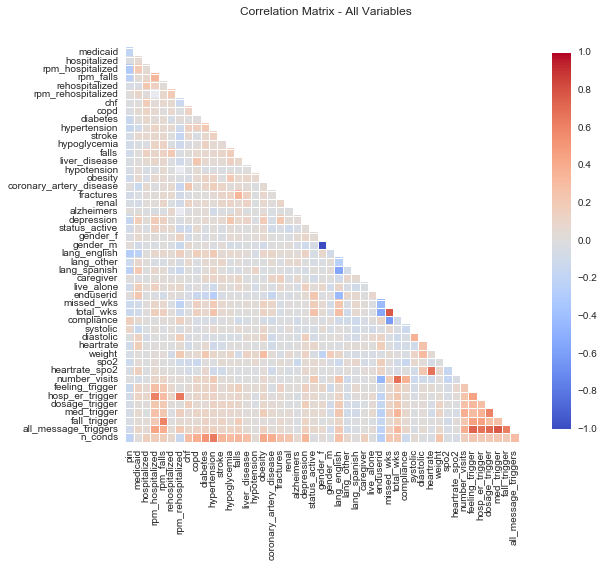

In [5]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data_df, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [6]:
data_df['lang_other'].value_counts()

0.0    600
1.0     17
Name: lang_other, dtype: int64

## Correlations and removing data
We don't want multicollinearity in our data, so columns that are correllated or anti-correllated need to be removed. From the correlation plot above, we can see that gender_m and lang_english are anti-correllated with gender_f and lang_spanish, respectively.
* Drop 'gender_m' and 'lang_english' because they area anticorrellated with 'gender_f' and 'lang_spanish'
* Drop low n columns of chronic conditions. these are:
  * renal 9
  * alzheimers 6
  * fractures 8
  * hypotension 3
  * liver disease 6
  * hypoglycemia 7
  * falls 16
  * lang_other 17

In [7]:
#correlated measures
data_df.drop(['gender_m','lang_english','lang_other'],axis=1,inplace=True)
data_df.drop(['renal','alzheimers','fractures','hypotension','liver_disease','hypoglycemia','falls'],axis=1,inplace=True)
#ids we don't need
data_df.drop(['pin','enduserid'],axis=1,inplace=True)

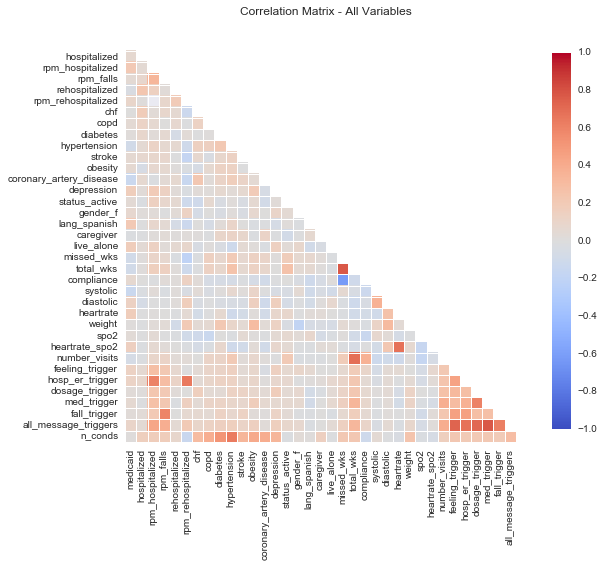

In [8]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data_df, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

#### correlated columns
feature | corr feature(s) | remove feature(s)
------- | --------------- | --------------
heartrate | heartrate_spo2 | heartrate_spo2
rpm_hospitalized | hosp_er_trigger | hosp_er_trigger
number_visits | total_wks | total_wks
compliance | missed_wks | missed_wks
all_message_triggers | many triggers | all triggers except feeling


In [9]:
data_df.drop(['heartrate_spo2','hosp_er_trigger','all_message_triggers','total_wks','missed_wks','dosage_trigger',
              'med_trigger','fall_trigger'],axis=1,inplace=True)
# Remove rpm_hospitalized as well because it has many NaNs (we drop NaNs later)
data_df.drop(['rpm_rehospitalized'],axis=1,inplace=True)

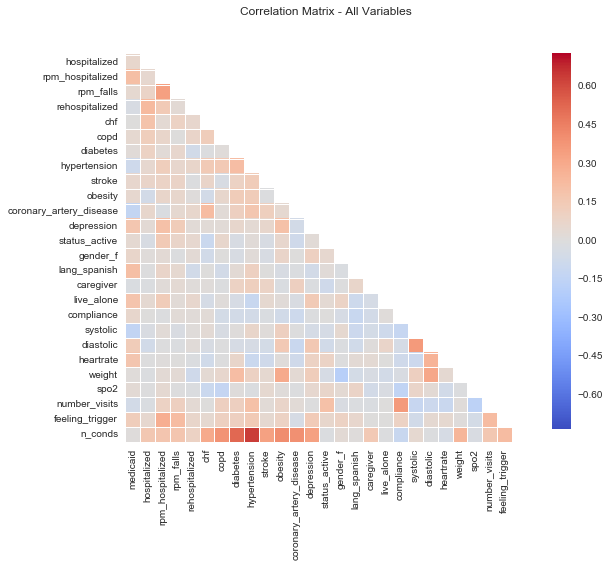

In [10]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data_df, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [11]:
print data_df.count(0)

d.o.b.                     515
medicaid                   456
hospitalized               514
rpm_hospitalized           617
rpm_falls                  617
rehospitalized             512
chf                        617
copd                       617
diabetes                   617
hypertension               617
stroke                     617
obesity                    617
coronary_artery_disease    617
depression                 617
status_active              617
gender_f                   617
lang_spanish               617
caregiver                  509
live_alone                 509
first_measure_date         617
compliance                 534
systolic                   617
diastolic                  617
heartrate                  616
weight                     617
spo2                       617
age                        515
number_visits              617
duration_in_program        617
feeling_trigger            617
n_conds                    617
dtype: int64


## NOTE: remove age

In [12]:
print data_df.shape
data_df.drop(['rehospitalized','d.o.b.','status_active','first_measure_date'],axis=1,inplace=True)
data_df.dropna(inplace=True)
print data_df.shape
data_df.reset_index(drop=True,inplace=True)
print data_df.shape

(617, 31)
(388, 27)
(388, 27)


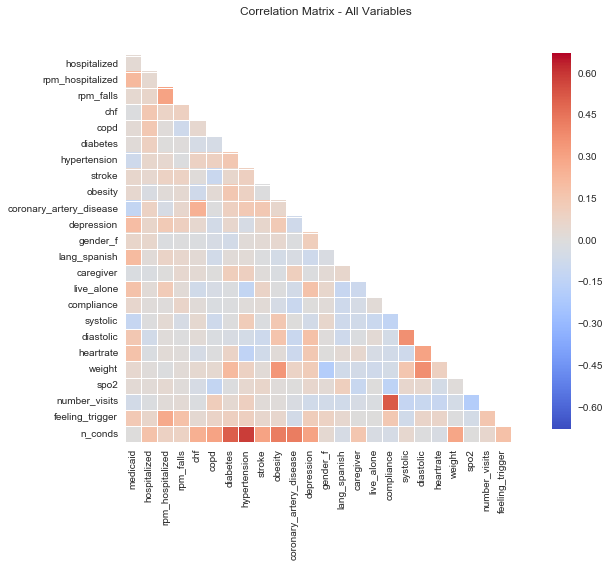

In [13]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data_df, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [14]:
data_df.drop(['number_visits'],axis=1,inplace=True)

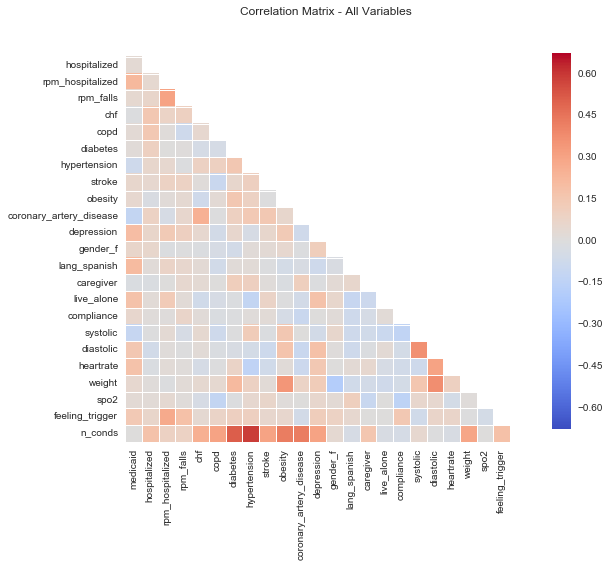

In [15]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data_df, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [16]:
data_df['intercept'] = 1.0
print data_df.columns

Index([u'medicaid', u'hospitalized', u'rpm_hospitalized', u'rpm_falls', u'chf',
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept'],
      dtype='object')


In [17]:
data_df['age']=data_df['age'].apply(lambda x: pd.tslib.Timedelta(x).days)
data_df['duration_in_program']=data_df['duration_in_program'].apply(lambda x: pd.tslib.Timedelta(x).days)

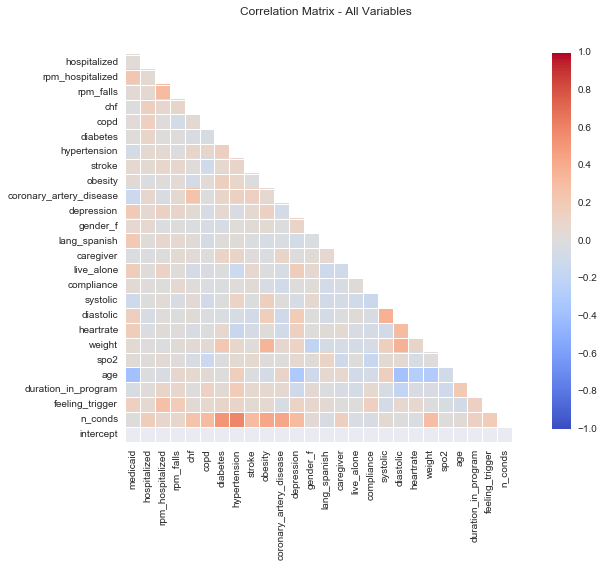

In [19]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data_df, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C63E6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1BC278>]], dtype=object)

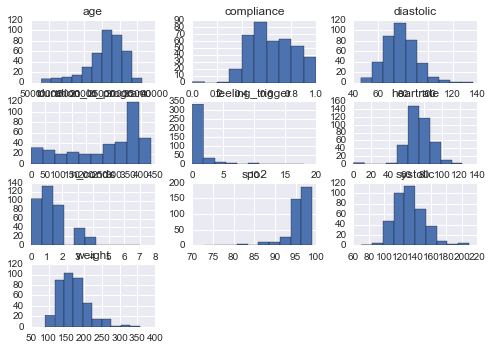

In [20]:
continuous_feats = ['age','compliance','spo2','heartrate','weight','diastolic','systolic','duration_in_program',
                    'feeling_trigger','n_conds']
data_df[continuous_feats].hist()

In [22]:
for feature in continuous_feats:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_df[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_df[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print (data_df[~((data_df[feature] >= Q1 - step) & (data_df[feature] <= Q3 + step))]).index
    display(data_df[~((data_df[feature] >= Q1 - step) & (data_df[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'age':
Int64Index([170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
170,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.500000,112.0,72.0,63.0,185.4,99.0,13576,21,0,0,1.0
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306,326,0,0,1.0
179,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.513514,142.0,97.0,104.0,185.6,97.0,13362,339,0,1,1.0
180,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.423077,118.0,90.0,82.0,195.3,99.0,10058,210,0,1,1.0
196,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.500000,108.0,74.0,74.0,204.4,98.0,9947,46,1,1,1.0
200,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.595745,94.0,74.0,63.0,134.9,98.0,12217,329,0,0,1.0
206,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,98.0,63.0,67.0,135.0,99.0,13963,56,0,0,1.0
210,1.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.720000,102.0,67.0,85.0,132.9,99.0,10636,350,0,1,1.0
213,1.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.648649,142.0,101.0,70.0,196.9,94.0,15178,322,0,1,1.0
216,1.0,0.0,1.0,0.0,0,0,1,0,0,1,0,1,1.0,0.0,0.0,1.0,0.604167,146.0,99.0,97.0,245.4,97.0,13480,336,4,3,1.0


Data points considered outliers for the feature 'compliance':
Int64Index([137], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
137,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,1.0,1.0,1.0,0.0,92.0,71.0,69.0,116.0,97.0,24288,112,0,3,1.0


Data points considered outliers for the feature 'spo2':
Int64Index([ 31,  87, 120, 142, 151, 160, 182, 191, 228, 232, 241, 242, 273,
            286, 287, 289, 290, 295, 314, 323, 328, 329, 339, 342, 350, 358,
            371],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
31,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.943396,90.0,72.0,87.0,159.8,88.0,34190,374,0,0,1.0
87,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.460000,118.0,52.0,57.0,111.0,80.0,32282,378,0,0,1.0
120,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,0.872727,136.0,77.0,89.0,134.9,87.0,26130,385,1,0,1.0
142,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.400000,152.0,90.0,71.0,119.3,88.0,28871,360,2,0,1.0
151,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.773585,122.0,72.0,87.0,179.7,87.0,30396,374,3,0,1.0
160,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.631579,121.0,58.0,78.0,147.0,90.0,26255,140,0,1,1.0
182,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,126.0,90.0,67.0,194.0,76.0,17174,350,1,0,1.0
191,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.673469,98.0,76.0,83.0,164.2,73.0,21915,343,4,2,1.0
228,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.500000,116.0,83.0,98.0,119.3,90.0,17161,45,1,0,1.0
232,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.833333,133.0,89.0,73.0,189.2,82.0,11948,67,1,0,1.0


Data points considered outliers for the feature 'heartrate':
Int64Index([74, 174, 177, 193, 203, 209, 297, 309, 313, 366], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
74,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.607843,120.0,86.0,123.0,178.1,97.0,29497,367,0,0,1.0
174,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,112.0,80.0,107.0,215.8,94.0,21289,332,9,1,1.0
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306,326,0,0,1.0
193,1.0,1.0,1.0,0.0,0,0,1,1,1,0,0,0,1.0,0.0,0.0,1.0,0.392857,159.0,102.0,109.0,229.3,97.0,24697,238,0,3,1.0
203,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.550000,127.0,103.0,113.0,202.4,97.0,22674,143,0,1,1.0
209,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.585366,144.0,96.0,109.0,145.1,99.0,20329,287,3,0,1.0
297,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759,427,1,2,1.0
309,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,1.0,0.0,0.0,1.0,0.754098,140.0,66.0,0.0,159.0,97.0,31184,415,0,2,1.0
313,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.512195,159.0,80.0,118.0,97.2,96.0,31375,392,0,0,1.0
366,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.750000,131.0,62.0,0.0,158.0,93.0,32681,119,0,1,1.0


Data points considered outliers for the feature 'weight':
Int64Index([0, 37, 44, 173, 271, 353, 354, 356, 357, 359, 364], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,1.0,0.0,0.0,0.0,0.773585,147.0,68.0,55.0,269.2,97.0,27231,371,3,3,1.0
37,0.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.400000,148.0,98.0,83.0,267.0,96.0,25044,189,0,2,1.0
44,1.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.431818,149.0,91.0,82.0,319.0,96.0,24951,371,2,2,1.0
173,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,143.0,98.0,80.0,268.1,97.0,21659,353,0,1,1.0
271,1.0,1.0,0.0,0.0,0,0,1,1,0,1,0,0,0.0,0.0,0.0,0.0,0.545455,162.0,109.0,88.0,321.7,94.0,21818,154,0,3,1.0
353,0.0,1.0,0.0,0.0,1,0,1,1,0,0,1,0,0.0,0.0,0.0,0.0,0.923077,117.0,64.0,68.0,321.7,95.0,28029,112,0,4,1.0
354,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.507937,128.0,89.0,95.0,356.9,95.0,23599,411,0,3,1.0
356,1.0,0.0,0.0,0.0,0,0,1,1,0,1,0,0,1.0,0.0,0.0,1.0,0.737705,125.0,78.0,52.0,268.3,95.0,25533,413,0,3,1.0
357,1.0,0.0,0.0,0.0,0,0,1,1,1,0,0,0,1.0,0.0,0.0,1.0,0.600000,132.0,86.0,62.0,267.0,98.0,20502,427,1,3,1.0
359,0.0,0.0,0.0,0.0,0,0,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.534483,183.0,87.0,70.0,281.7,93.0,25019,393,0,3,1.0


Data points considered outliers for the feature 'diastolic':
Int64Index([226, 230, 231, 336, 349], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
226,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.428571,150.0,110.0,81.0,260.4,97.0,14833,196,1,2,1.0
230,1.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.523810,145.0,136.0,64.0,185.8,98.0,21522,147,0,0,1.0
231,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.600000,154.0,118.0,84.0,159.0,98.0,13696,42,1,0,1.0
336,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,1.0,0.0,0.0,0.0,0.559322,157.0,111.0,85.0,219.4,94.0,29670,378,0,3,1.0
349,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.791667,164.0,114.0,63.0,156.0,97.0,32234,168,0,1,1.0


Data points considered outliers for the feature 'systolic':
Int64Index([17, 30, 95, 185, 235, 284, 346, 359, 361], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
17,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.857143,199.0,101.0,71.0,133.0,97.0,28114,32,1,1,1.0
30,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.711538,205.0,91.0,72.0,172.0,94.0,27544,374,0,1,1.0
95,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.860000,182.0,94.0,69.0,259.9,96.0,26636,350,2,0,1.0
185,1.0,0.0,1.0,0.0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564,353,5,2,1.0
235,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.714286,193.0,84.0,75.0,185.0,99.0,20417,49,0,1,1.0
284,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.285714,180.0,82.0,62.0,165.6,93.0,33327,22,0,1,1.0
346,1.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.842105,70.0,48.0,58.0,161.6,96.0,25738,399,0,2,1.0
359,0.0,0.0,0.0,0.0,0,0,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.534483,183.0,87.0,70.0,281.7,93.0,25019,393,0,3,1.0
361,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.769231,209.0,95.0,61.0,160.9,94.0,31769,98,0,1,1.0


Data points considered outliers for the feature 'duration_in_program':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept


Data points considered outliers for the feature 'feeling_trigger':
Int64Index([  0,  47,  59,  62,  70,  71,  86,  89,  90, 119, 136, 150, 151,
            156, 174, 175, 181, 184, 185, 191, 197, 207, 209, 216, 217, 233,
            243, 246, 248, 302, 304, 323, 355, 368],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
0,0.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,1.0,0.0,0.0,0.0,0.773585,147.0,68.0,55.0,269.2,97.0,27231,371,3,3,1.0
47,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.000000,119.0,68.0,78.0,146.8,96.0,27105,283,4,0,1.0
59,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,1.0,0.0,1.0,0.0,0.400000,142.0,79.0,56.0,192.9,99.0,25431,42,3,2,1.0
62,1.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,1.0,1.0,0.0,0.0,0.891892,139.0,71.0,60.0,169.5,97.0,30241,266,4,1,1.0
70,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,1.0,1.0,0.0,0.0,0.603774,140.0,94.0,76.0,232.1,98.0,27776,371,3,2,1.0
71,1.0,0.0,1.0,0.0,0,0,0,1,1,0,0,0,0.0,1.0,0.0,0.0,0.622642,125.0,56.0,64.0,139.8,96.0,28097,371,3,2,1.0
86,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.685185,110.0,64.0,63.0,168.0,96.0,22712,381,5,0,1.0
89,0.0,0.0,1.0,0.0,0,1,0,1,0,0,0,0,1.0,0.0,0.0,1.0,0.480769,115.0,63.0,72.0,120.8,94.0,29442,371,7,2,1.0
90,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,1.0,1.0,0.0,1.0,0.716981,135.0,79.0,78.0,137.3,98.0,28830,374,6,1,1.0
119,0.0,1.0,1.0,1.0,0,0,0,1,0,0,0,1,1.0,0.0,0.0,1.0,0.854545,126.0,78.0,64.0,110.5,98.0,25219,385,12,4,1.0


Data points considered outliers for the feature 'n_conds':
Int64Index([127, 184], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rpm_falls,chf,copd,diabetes,hypertension,stroke,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,duration_in_program,feeling_trigger,n_conds,intercept
127,0.0,0.0,1.0,0.0,0,0,1,1,1,1,1,0,1.0,0.0,1.0,1.0,0.461538,129.0,66.0,58.0,214.5,96.0,24571,371,1,7,1.0
184,1.0,0.0,1.0,1.0,1,0,0,1,1,0,1,1,1.0,0.0,0.0,1.0,0.700000,158.0,81.0,67.0,182.5,94.0,23500,353,3,6,1.0


In [23]:
age_outliers  = [170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269]
hr_outliers = []
spo2_outliers = [182,191]
diastol_outliers = []
systol_outliers = [346]
compl_outliers = [137]
outliers = age_outliers + hr_outliers + spo2_outliers + compl_outliers + systol_outliers + diastol_outliers
# Remove the outliers, if any were specified
good_data = data_df.drop(data_df.index[outliers]).reset_index(drop = True)
print good_data.shape

(364, 27)


In [32]:
print good_data.columns
good_data.to_csv('../data/good_data_20160831_364x27.csv',index=False)

Index([u'medicaid', u'hospitalized', u'rpm_hospitalized', u'rpm_falls', u'chf',
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept'],
      dtype='object')


In [29]:
train_cols = [u'medicaid', u'hospitalized', u'chf', #print np.exp(result.params)
       u'copd', u'diabetes', u'hypertension', u'stroke', u'obesity',
       u'coronary_artery_disease', u'depression', u'gender_f', u'lang_spanish',
       u'caregiver', u'live_alone', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'age', u'duration_in_program',
       u'feeling_trigger', u'n_conds', u'intercept']
#print train_cols
#  # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
import statsmodels.api as sm
logit = sm.Logit(good_data['rpm_hospitalized'], good_data[train_cols])

  # fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.405744
         Iterations 7


In [30]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  364
Model:                          Logit   Df Residuals:                      339
Method:                           MLE   Df Model:                           24
Date:                Wed, 31 Aug 2016   Pseudo R-squ.:                  0.1712
Time:                        17:58:17   Log-Likelihood:                -147.69
converged:                       True   LL-Null:                       -178.20
                                        LLR p-value:                 4.590e-05
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
medicaid                    1.0765      0.336      3.206      0.001         0.418     1.735
hospitalized                0.1363      0.352      0.387      0.699        -0.554     0.826


In [31]:
print np.exp(result.params)

medicaid                   2.934318
hospitalized               1.146010
chf                        1.402777
copd                       0.509411
diabetes                   0.373249
hypertension               0.568107
stroke                     0.792812
obesity                    0.420151
coronary_artery_disease    0.306017
depression                 0.676168
gender_f                   0.547884
lang_spanish               1.231347
caregiver                  1.922961
live_alone                 2.517888
compliance                 0.609216
systolic                   1.014396
diastolic                  0.987357
heartrate                  1.000514
weight                     0.998228
spo2                       1.064506
age                        0.999985
duration_in_program        1.003296
feeling_trigger            1.327183
n_conds                    1.929827
intercept                  0.000074
dtype: float64
